In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load the data
path = "/content/drive/MyDrive/final_all_data.csv"
data = pd.read_csv(path)

# Perform basic statistical analysis
data_describe = data.describe(include='all')

# Check for missing values
missing_values = data.isnull().sum()

# Display basic information and first few rows of the data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60395 entries, 0 to 60394
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   imo                       60395 non-null  int64  
 1   v_draft                   60395 non-null  float64
 2   v_departure_port          60395 non-null  object 
 3   v_departure_lat           60395 non-null  float64
 4   v_departure_lon           60395 non-null  float64
 5   v_arrival_port            60395 non-null  object 
 6   v_arrival_lat             60395 non-null  float64
 7   v_arrival_lon             60395 non-null  float64
 8   v_departure_time          60395 non-null  object 
 9   v_arrival_time            60395 non-null  object 
 10  v_sea_passage_start_time  60395 non-null  object 
 11  v_sea_passage_end_time    60395 non-null  object 
 12  ship_type                 60395 non-null  object 
 13  co2                       60395 non-null  float64
 14  seapas

,imo,v_draft,v_departure_port,v_departure_lat,v_departure_lon,v_arrival_port,v_arrival_lat,v_arrival_lon,v_departure_time,v_arrival_time,...,time_bf3,time_bf4,time_bf5,time_bf6,time_bf7,time_bf8,time_bf9,time_bf10,time_bf11,time_bf12
0,7801740,6.8,Sao Cristovao,-22.850000,-43.133333,Guanabara Bay Terminals,-22.813683,-43.155383,01/21/19 02:45 AM,01/22/19 06:55 PM,...,45206.875554,37049.896256,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,7801740,7.2,Acu Superport,-21.827500,-40.979367,Santos,-23.992733,-46.306067,04/26/19 07:53 PM,04/28/19 08:05 PM,...,76989.194793,60689.985169,8301.058044,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,7801740,8.0,Acu Superport,-21.827500,-40.979367,Rio de Janeiro,-22.882350,-43.197333,10/23/19 07:18 PM,10/24/19 05:19 PM,...,39758.155579,26014.879939,3532.756501,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,7801740,7.5,Marlim Oil Field,-22.340150,-40.204333,Governor's Island,-22.850000,-43.133333,01/03/19 04:20 PM,01/07/19 04:47 PM,...,108898.555701,36047.753298,23668.295669,30668.040468,0.0,0.0,0.0,0.0,0.0,0.0
4,7801740,7.6,Alemoa Terminal,-23.918333,-46.363300,Admiral Barroso Terminal,-23.808333,-45.386667,05/01/19 10:42 AM,05/14/19 12:43 PM,...,265237.869432,303342.698297,283328.780710,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Display basic information and first few rows of the data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60395 entries, 0 to 60394
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   imo                       60395 non-null  int64  
 1   v_draft                   60395 non-null  float64
 2   v_departure_port          60395 non-null  object 
 3   v_departure_lat           60395 non-null  float64
 4   v_departure_lon           60395 non-null  float64
 5   v_arrival_port            60395 non-null  object 
 6   v_arrival_lat             60395 non-null  float64
 7   v_arrival_lon             60395 non-null  float64
 8   v_departure_time          60395 non-null  object 
 9   v_arrival_time            60395 non-null  object 
 10  v_sea_passage_start_time  60395 non-null  object 
 11  v_sea_passage_end_time    60395 non-null  object 
 12  ship_type                 60395 non-null  object 
 13  co2                       60395 non-null  float64
 14  seapas

,imo,v_draft,v_departure_port,v_departure_lat,v_departure_lon,v_arrival_port,v_arrival_lat,v_arrival_lon,v_departure_time,v_arrival_time,...,time_bf3,time_bf4,time_bf5,time_bf6,time_bf7,time_bf8,time_bf9,time_bf10,time_bf11,time_bf12
0,7801740,6.8,Sao Cristovao,-22.850000,-43.133333,Guanabara Bay Terminals,-22.813683,-43.155383,01/21/19 02:45 AM,01/22/19 06:55 PM,...,45206.875554,37049.896256,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,7801740,7.2,Acu Superport,-21.827500,-40.979367,Santos,-23.992733,-46.306067,04/26/19 07:53 PM,04/28/19 08:05 PM,...,76989.194793,60689.985169,8301.058044,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,7801740,8.0,Acu Superport,-21.827500,-40.979367,Rio de Janeiro,-22.882350,-43.197333,10/23/19 07:18 PM,10/24/19 05:19 PM,...,39758.155579,26014.879939,3532.756501,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,7801740,7.5,Marlim Oil Field,-22.340150,-40.204333,Governor's Island,-22.850000,-43.133333,01/03/19 04:20 PM,01/07/19 04:47 PM,...,108898.555701,36047.753298,23668.295669,30668.040468,0.0,0.0,0.0,0.0,0.0,0.0
4,7801740,7.6,Alemoa Terminal,-23.918333,-46.363300,Admiral Barroso Terminal,-23.808333,-45.386667,05/01/19 10:42 AM,05/14/19 12:43 PM,...,265237.869432,303342.698297,283328.780710,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Perform one-hot encoding for the 'ship_type' feature
encoder = OneHotEncoder(sparse=False)
ship_type_encoded = encoder.fit_transform(data[['ship_type']])
ship_type_encoded_df = pd.DataFrame(ship_type_encoded, columns=encoder.get_feature_names_out(['ship_type']))
data = pd.concat([data, ship_type_encoded_df], axis=1)  # Add the encoded ship_type columns to the DataFrame

# Perform label encoding for the 'imos' feature
label_encoder = LabelEncoder()
data['imos_encoded'] = label_encoder.fit_transform(data['imo'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
# Perform k-means clustering for the 'seapassage_distance' feature
kmeans = KMeans(n_clusters=3).fit(data[['seapassage_distance']])  # You can choose the number of clusters (e.g., 5)
data['kmeans'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-6-5dba5144bbf5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


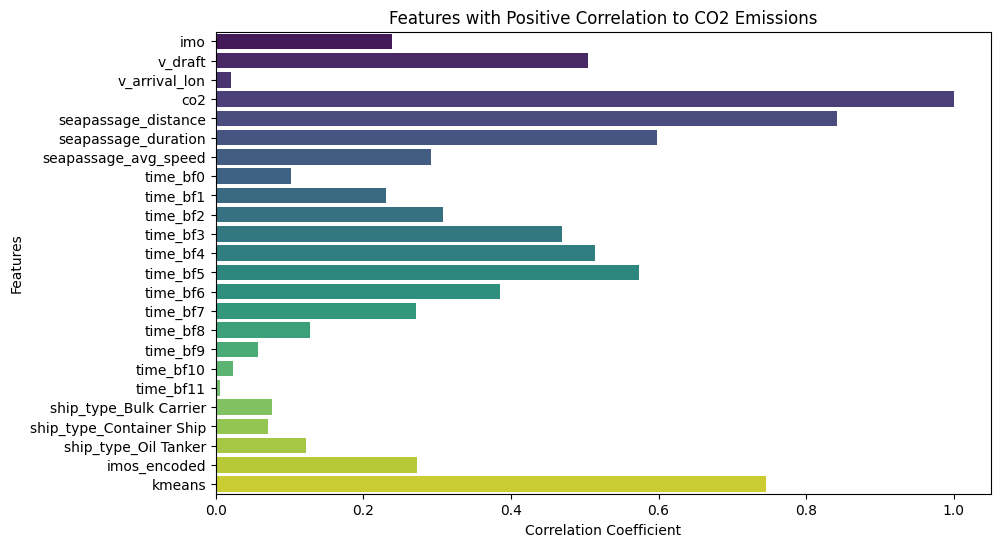

In [6]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Filter features with positive correlation to CO2 emissions
positive_corr_features = correlation_matrix['co2'][correlation_matrix['co2'] > 0]

# Create a bar plot to visualize positive correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=positive_corr_features.values, y=positive_corr_features.index, palette='viridis')
plt.title('Features with Positive Correlation to CO2 Emissions')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [8]:
# Drop the irrelevant features
data = data.drop(columns=['v_departure_port', 'v_arrival_port', 'v_departure_time', 'v_arrival_time', 'v_sea_passage_start_time', 'v_sea_passage_end_time'])

In [9]:
# Features for model development
features = [
    'imo', 'v_draft', 'v_arrival_lon',
    'seapassage_distance', 'seapassage_duration', 'seapassage_avg_speed', 'time_bf0', 'time_bf1',
    'time_bf2', 'time_bf3', 'time_bf4', 'time_bf5', 'time_bf6',
    'time_bf7', 'time_bf8', 'time_bf9', 'time_bf10', 'time_bf11',
    'ship_type_Bulk Carrier', 'ship_type_Container Ship', 'ship_type_General Cargo Ship', 'ship_type_Oil Tanker', 'imos_encoded', 'kmeans'
]

# Step 1: Identify unique 'imos'
unique_imos = data['imo'].unique()

# Step 2: Split unique 'imos' into train and test sets (20% for test set)
imos_train, imos_test = train_test_split(unique_imos, test_size=0.2, random_state=0)

# Step 3: Create train and test datasets based on 'imos'
train_data = data[data['imo'].isin(imos_train)]
test_data = data[data['imo'].isin(imos_test)]

# Creating feature matrix X and target vector y for both training and testing sets
X_train = train_data[features]
y_train = train_data['co2']
X_test = test_data[features]
y_test = test_data['co2']

# Initialize a MinMaxScaler for the input features
input_scaler = MinMaxScaler(feature_range=(0, 1))
output_scaler = MinMaxScaler(feature_range=(0, 1))  # Separate scaler for the target variable

# Fit and transform the scaler on the training data for input features
X_train_scaled = input_scaler.fit_transform(X_train)

# Apply the scaler (transform only) to the test data for input features
X_test_scaled = input_scaler.transform(X_test)

# Fit and transform the scaler on the training target variable
y_train_scaled = output_scaler.fit_transform(y_train.values.reshape(-1, 1))

In [10]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_lr_scaled = linear_reg.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
y_pred_lr = output_scaler.inverse_transform(y_pred_lr_scaled.reshape(-1, 1))

# Calculate R-squared, MAE, and RMSE on the original scale
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
nrmse_lr = rmse_lr / np.mean(y_test)

# Displaying the evaluation metrics for Linear Regression
(r2_lr, mae_lr, rmse_lr, nrmse_lr)

(0.7591701932562842,
 158.85922485013631,
 310.68655437327135,
 1.2680608913099494)

In [11]:
# Random Forest
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_rf_scaled = random_forest.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
y_pred_rf = output_scaler.inverse_transform(y_pred_rf_scaled.reshape(-1, 1))

# Calculate R-squared, MAE, and RMSE on the original scale
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
nrmse_rf = rmse_rf / np.mean(y_test)

# Displaying the evaluation metrics for Random Forest
(r2_rf, mae_rf, rmse_rf, nrmse_rf)

(0.9394196444470315,
 53.058821601839654,
 155.82360551196805,
 0.6359908960052354)

In [12]:
# XGBoost
xgboost_model = xgb.XGBRegressor(random_state=42)
xgboost_model.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_xgb_scaled = xgboost_model.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
y_pred_xgb = output_scaler.inverse_transform(y_pred_xgb_scaled.reshape(-1, 1))

# Calculate R-squared, MAE, and RMSE on the original scale
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
nrmse_xgb = rmse_xgb / np.mean(y_test)

# Displaying the evaluation metrics for XGBoost
(r2_xgb, mae_xgb, rmse_xgb, nrmse_xgb)

(0.9235087665702301, 58.61528123031349, 175.0947691795564, 0.714645760958105)

In [13]:
# LightGBM
lightgbm_model = lgb.LGBMRegressor(random_state=42)
lightgbm_model.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_lgb_scaled = lightgbm_model.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
y_pred_lgb = output_scaler.inverse_transform(y_pred_lgb_scaled.reshape(-1, 1))

# Calculate R-squared, MAE, and RMSE on the original scale
r2_lgb = r2_score(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
nrmse_lgb = rmse_lgb / np.mean(y_test)

# Displaying the evaluation metrics for LightGBM
(r2_lgb, mae_lgb, rmse_lgb, nrmse_lgb)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4093
[LightGBM] [Info] Number of data points in the train set: 48095, number of used features: 22
[LightGBM] [Info] Start training from score 0.016548


(0.9292392354887008, 55.051815665079424, 168.4083412567403, 0.6873552405537389)

In [14]:
# Instantiate an XGBoost regressor object
xgb_reg = xgb.XGBRegressor(random_state=42)

# Create the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}

# Instantiate the GridSearchCV object
grid_reg = GridSearchCV(xgb_reg, param_grid, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_reg.fit(X_train_scaled, y_train_scaled.ravel())

# Print the best parameters
print("Best parameters found: ", grid_reg.best_params_)

# Instantiate an XGBoost regressor object with the best parameters
best_xgb_reg = xgb.XGBRegressor(random_state=42, **grid_reg.best_params_)

# Fit the model to the training data
best_xgb_reg.fit(X_train_scaled, y_train_scaled.ravel())

# Make predictions on the test data
y_pred_xgb_scaled = best_xgb_reg.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
y_pred_xgb = output_scaler.inverse_transform(y_pred_xgb_scaled.reshape(-1, 1))

# Calculate R-squared, MAE, and RMSE on the original scale
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
nrmse_xgb = rmse_xgb / np.mean(y_test)

# Displaying the evaluation metrics for the best XGBoost model
(r2_xgb, mae_xgb, rmse_xgb, nrmse_xgb)

Best parameters found:  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


(0.9203230961332792, 58.07029599503101, 178.70370838037465, 0.7293755733534453)

In [15]:
# Initialize a MinMaxScaler for the input features
input_scaler = MinMaxScaler(feature_range=(0, 1))
output_scaler = MinMaxScaler(feature_range=(0, 1))  # Separate scaler for the target variable

# Fit and transform the scaler on the training data for input features
X_train_scaled = input_scaler.fit_transform(X_train)

# Transform the scaler on the testing data for input features
X_test_scaled = input_scaler.transform(X_test)

# Fit and transform the scaler on the training data for the target variable
y_train_scaled = output_scaler.fit_transform(y_train.values.reshape(-1, 1))

# Transform the scaler on the testing data for the target variable
y_test_scaled = output_scaler.transform(y_test.values.reshape(-1, 1))

# Train the general model on the entire scaled dataset
# Instantiate an XGBoost regressor object with the best parameters found previously
general_model = xgb.XGBRegressor(random_state=42, **grid_reg.best_params_)
general_model.fit(X_train_scaled, y_train_scaled.ravel())

# Group Data by Ship Type (Step 2)
grouped_by_ship_type = data.groupby('ship_type')

# Initialize dictionaries for storing models and performance metrics (Step 3 and 4)
ship_type_specific_models = {}
ship_type_ensemble_models = {}
ship_type_performance_metrics = {}

# Define the parameter grid for hyperparameter tuning
param_grid = {

    # Define the parameter grid
}

# Function to calculate performance metrics
def evaluate_performance(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    nrmse = rmse / np.mean(y_true)
    return r2, mae, rmse, nrmse

# For each ship type, train a specific model and create an ensemble model (Step 3 and 4)
for ship_type, group in grouped_by_ship_type:
    # Prepare data for this ship type
    X_ship_type = group[features]
    y_ship_type = group['co2']

    # Split the data into train and test sets
    X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(
        X_ship_type, y_ship_type, test_size=0.2, random_state=0
    )

    # Scale the data
    X_train_st_scaled = input_scaler.transform(X_train_st)
    X_test_st_scaled = input_scaler.transform(X_test_st)
    y_train_st_scaled = output_scaler.transform(y_train_st.values.reshape(-1, 1))

    # Train a ship type-specific model
    st_model = xgb.XGBRegressor(random_state=42)
    st_model.fit(X_train_st_scaled, y_train_st_scaled.ravel())

    # Save the ship type-specific model
    ship_type_specific_models[ship_type] = st_model

    # Create an ensemble model
    ensemble_st = VotingRegressor(
        estimators=[
            ('general', general_model),
            ('ship_type_specific', st_model)
        ],
        weights=[1, 1]  # Adjust the weights as needed
    )

    # Fit the ensemble model
    ensemble_st.fit(X_train_st_scaled, y_train_st_scaled.ravel())

    # Store the ensemble model
    ship_type_ensemble_models[ship_type] = ensemble_st

    # Evaluate performance on test data (Step 5)
    y_pred_st_scaled = ensemble_st.predict(X_test_st_scaled)
    y_pred_st = output_scaler.inverse_transform(y_pred_st_scaled.reshape(-1, 1))

    # Calculate and store performance metrics
    r2, mae, rmse, nrmse = evaluate_performance(y_test_st, y_pred_st)
    ship_type_performance_metrics[ship_type] = {
        'R2': r2, 'MAE': mae, 'RMSE': rmse, 'NRMSE': nrmse
    }

# Print the performance metrics for each ship type
for ship_type, metrics in ship_type_performance_metrics.items():
    print(f"Ship Type: {ship_type}, R2: {metrics['R2']}, MAE: {metrics['MAE']}, RMSE: {metrics['RMSE']}, NRMSE: {metrics['NRMSE']}")

Ship Type: Bulk Carrier, R2: 0.9396245860526277, MAE: 64.62730418900422, RMSE: 137.42005879797517, NRMSE: 0.3783355583027604
Ship Type: Container Ship, R2: 0.9769956462912569, MAE: 50.68846311549249, RMSE: 114.43566019672565, NRMSE: 0.3112985892599338
Ship Type: General Cargo Ship, R2: 0.9012384488545089, MAE: 5.635586603217786, RMSE: 18.543321299647204, NRMSE: 0.7226761720351401
Ship Type: Oil Tanker, R2: 0.929911410962381, MAE: 85.27930458029827, RMSE: 258.9433612981785, NRMSE: 0.5804462658770683


In [ ]:
# Convert the performance metrics into a DataFrame
performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')

# Save the DataFrame to a CSV file
# Save the results DataFrame to a CSV file
performance_df.to_csv('results.csv')